In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime as dt
from datetime import timedelta
import seaborn as sns
import plotly 
plotly.tools.set_credentials_file(username='ktseng1234', api_key='oOGLuJuw9sctUEV5CFBs')
import plotly.plotly as py

#### Data Import

In [2]:
gh_dd = pd.read_csv('https://www.dropbox.com/s/55makant6tr1wj1/sample_000.csv?dl=1')
#gh_dd = pd.read_csv('sample_000.csv')

#### Data Confirmation

In [3]:
gh_dd.head()

,DoorDash|2014-01-01|0ff637251252c802e6963809ceba7abc|63.0900
0,DoorDash|2014-01-01|9cdfabab1ed111db631d0fe401...
1,DoorDash|2014-01-01|3fabad8f4c13366995ced07cd3...
2,DoorDash|2014-01-01|85e094173d22407833147d648b...
3,DoorDash|2014-01-01|d291f39b8773fb3c69fdc2e283...
4,DoorDash|2014-01-01|3fabad8f4c13366995ced07cd3...


Data is not tab deliminated and has no column names

In [4]:
#Reload data with | deliminator and set column names
gh_dd = pd.read_csv('https://www.dropbox.com/s/55makant6tr1wj1/sample_000.csv?dl=1', header=None, sep = '|')
#gh_dd = pd.read_csv('sample_000.csv', header=None, sep = '|')
gh_dd.columns = ['company', 'date', 'member_id', 'amount']

In [5]:
# Check basic numbers
len(gh_dd)
gh_dd.company.unique()
gh_dd.nunique()
gh_dd.date.max() 
gh_dd.date.min()
gh_dd.amount.max()
gh_dd.amount.min()

10442410

array(['DoorDash', 'Grubhub'], dtype=object)

company           2
date           1186
member_id    410361
amount        23100
dtype: int64

'2017-03-31'

'2014-01-01'

8073.1201

0.01

In [6]:
gh_dd[gh_dd.amount > 100].company.count()
gh_dd[gh_dd.amount > 100].company.count()/len(gh_dd)

75649

0.007244400478433618

In [7]:
# Set date column to datetime type
gh_dd['date'] = pd.to_datetime(gh_dd['date'])

### Data Overview

In [8]:
#Seperate Grubhub and DoorDash data
gh = gh_dd[gh_dd.company == 'Grubhub']
dd = gh_dd[gh_dd.company == 'DoorDash']

In [9]:
# Daily summary
gh_date = gh.groupby('date')['amount'].agg(['sum', 'count']).reset_index()
gh_date.columns = ['date', 'daily_total', 'daily_transactions']
dd_date = dd.groupby('date')['amount'].agg(['sum', 'count']).reset_index()
dd_date.columns = ['date', 'daily_total', 'daily_transactions']

In [10]:
# Monthly Summary
gh_month = gh_date.set_index('date')
gh_month = gh_month.groupby(pd.Grouper(freq='M')).sum().reset_index()
dd_month = dd_date.set_index('date')
dd_month = dd_month.groupby(pd.Grouper(freq='M')).sum().reset_index()

##### Transaction Amount Distribution

In [11]:
binwidth = 1
bins = np.arange(0, max(gh_dd.amount) + binwidth, binwidth)

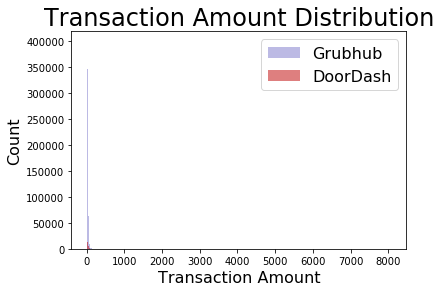

In [12]:
plt.hist(gh.amount, bins, alpha=0.5, label='Grubhub', color = '#7a77cb');
plt.hist(dd.amount, bins, alpha=0.5, label='DoorDash', color = '#be0000');
plt.legend(loc='upper right', fontsize = 16);
plt.title('Transaction Amount Distribution', fontsize = 24);
plt.xlabel('Transaction Amount', fontsize = 16);
plt.ylabel('Count', fontsize = 16);

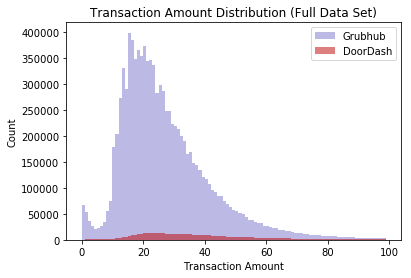

In [13]:
#Due to Outliers, histogram isn't useful, restrict histogram size to better view results
bins_lim = np.arange(0, 100, binwidth)
gh_y, gh_x, gh_ = plt.hist(gh.amount, bins_lim, alpha=0.5, label='Grubhub', color = '#7a77cb');
dd_y, dd_x, dd_ = plt.hist(dd.amount, bins_lim, alpha=0.5, label='DoorDash', color = '#be0000');
plt.legend(loc='upper right');
plt.title('Transaction Amount Distribution (Full Data Set)');
plt.xlabel('Transaction Amount');
plt.ylabel('Count');

In [14]:
#gh peak
gh_y.max()
np.where(gh_y == gh_y.max())
#dd peak
dd_y.max()
np.where(dd_y == dd_y.max())

398953.0

(array([15], dtype=int64),)

13251.0

(array([23], dtype=int64),)

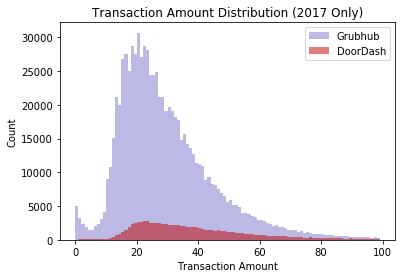

In [15]:
#Same Year comparison (2017)
gh_2017 = gh[gh.date >= '2017-01-01']
dd_2017 = dd[dd.date >= '2017-01-01']
bins_lim = np.arange(0, 100, binwidth)
gh_2017_y, gh_2017_x, gh_ = plt.hist(gh_2017.amount, bins_lim, alpha=0.5, label='Grubhub', color = '#7a77cb');
dd_2017_y, dd_2017_x, dd_ = plt.hist(dd_2017.amount, bins_lim, alpha=0.5, label='DoorDash', color = '#be0000');
plt.legend(loc='upper right');
plt.title('Transaction Amount Distribution (2017 Only)');
plt.xlabel('Transaction Amount');
plt.ylabel('Count');

In [16]:
#gh peak
gh_2017_y.max()
np.where(gh_2017_y == gh_2017_y.max())
#dd peak
dd_2017_y.max()
np.where(dd_2017_y == dd_2017_y.max())

30666.0

(array([20], dtype=int64),)

2769.0

(array([22], dtype=int64),)

In [17]:
#average of transactions
gh.amount.mean()
dd.amount.mean()
gh.amount.median()
dd.amount.median()

28.01867242049882

40.63415722642875

24.04

34.43

In [18]:
#average of transactions 2017 only
gh_2017.amount.mean()
dd_2017.amount.mean()
gh_2017.amount.median()
dd_2017.amount.median()

30.558257644211082

41.19204250779583

26.29

35.0

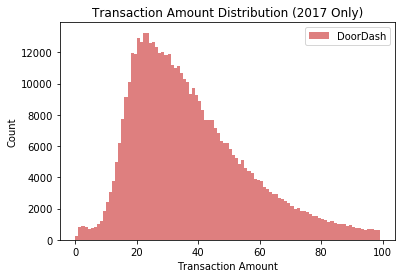

In [19]:
#dd only
dd_y, dd_x, dd_ = plt.hist(dd.amount, bins_lim, alpha=0.5, label='DoorDash', color = '#be0000');
plt.legend(loc='upper right');
plt.title('Transaction Amount Distribution (2017 Only)');
plt.xlabel('Transaction Amount');
plt.ylabel('Count');

##### Distribution of Daily Total Transactions

In [20]:
binwidth = 500
bins = np.arange(0, int(round(gh_date.daily_transactions.max())) + binwidth, binwidth)

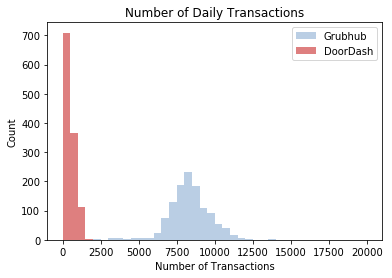

In [21]:
gh_y, gh_x, gh_ = plt.hist(gh_date.daily_transactions, bins, alpha=0.5, label='Grubhub', color = '#779ecb');
dd_y, dd_x, dd_ = plt.hist(dd_date.daily_transactions, bins, alpha=0.5, label='DoorDash', color = '#be0000');
plt.legend(loc='upper right');
plt.title('Number of Daily Transactions');
plt.xlabel('Number of Transactions');
plt.ylabel('Count');

In [22]:
#gh peak
gh_y.max()
np.where(gh_y == gh_y.max())
#dd peak
dd_y.max()
np.where(dd_y == dd_y.max())

231.0

(array([16], dtype=int64),)

709.0

(array([0], dtype=int64),)

##### Trend of Total Sales

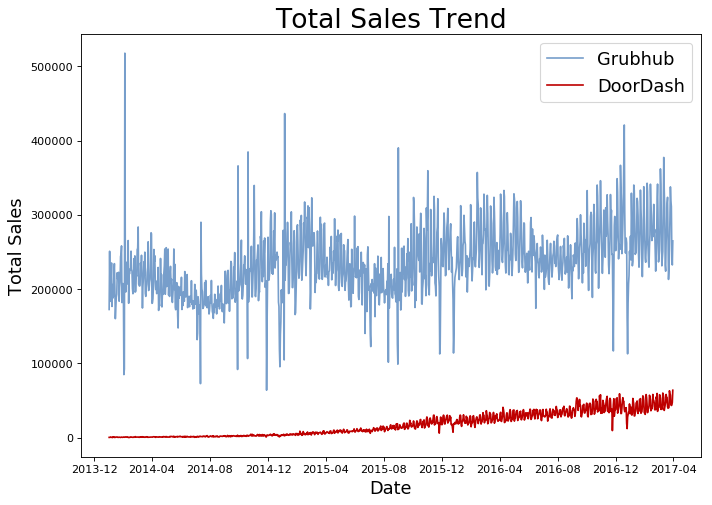

In [23]:
figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot_date(gh_date.date, gh_date.daily_total, label='Grubhub', ls='solid', marker='None', color = '#779ecb')
plt.plot_date(dd_date.date, dd_date.daily_total, label='DoorDash', ls='solid', marker='None', color = '#be0000')
plt.legend(loc='upper right', fontsize = 16);
plt.title('Total Sales Trend', fontsize = 24);
plt.xlabel('Date', fontsize = 16);
plt.ylabel('Total Sales', fontsize = 16);

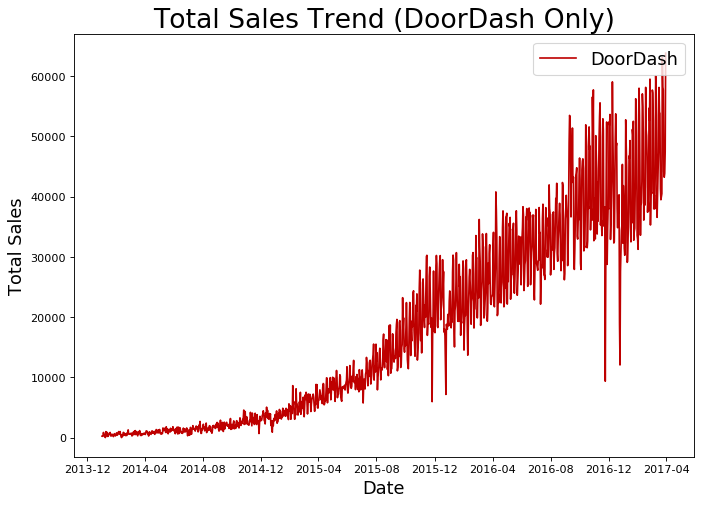

In [24]:
figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot_date(dd_date.date, dd_date.daily_total, label='DoorDash', ls='solid', marker='None', color = '#be0000')
plt.legend(loc='upper right', fontsize = 16);
plt.title('Total Sales Trend (DoorDash Only)', fontsize = 24);
plt.xlabel('Date', fontsize = 16);
plt.ylabel('Total Sales', fontsize = 16);

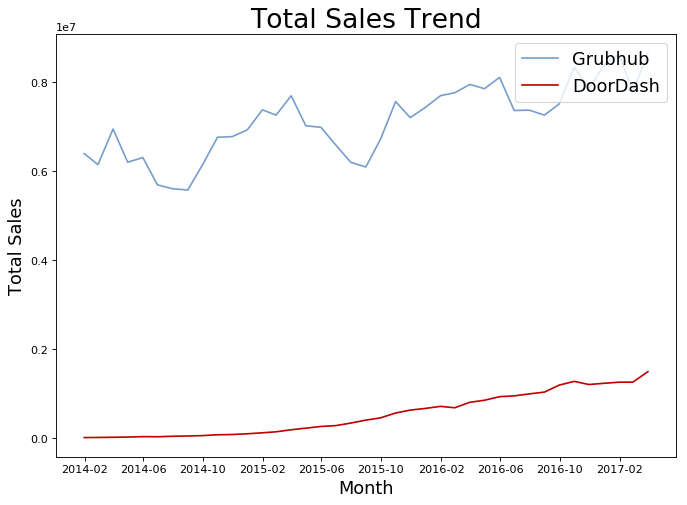

In [25]:
#Daily trend is really noisy, shift to a monthly result
figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot_date(gh_month.date, gh_month.daily_total, label='Grubhub', ls='solid', marker='None', color = '#779ecb')
plt.plot_date(dd_month.date, dd_month.daily_total, label='DoorDash', ls='solid', marker='None', color = '#be0000')
plt.legend(loc='upper right', fontsize = 16);
plt.title('Total Sales Trend', fontsize = 24);
plt.xlabel('Month', fontsize = 16);
plt.ylabel('Total Sales', fontsize = 16);

In [26]:
#gh peak
gh_month[gh_month.daily_total == max(gh_month.daily_total)]
#dd peak
dd_month[dd_month.daily_total == max(dd_month.daily_total)]

,date,daily_total,daily_transactions
38,2017-03-31,8.655293e+06,283068


,date,daily_total,daily_transactions
38,2017-03-31,1496030.2,36651


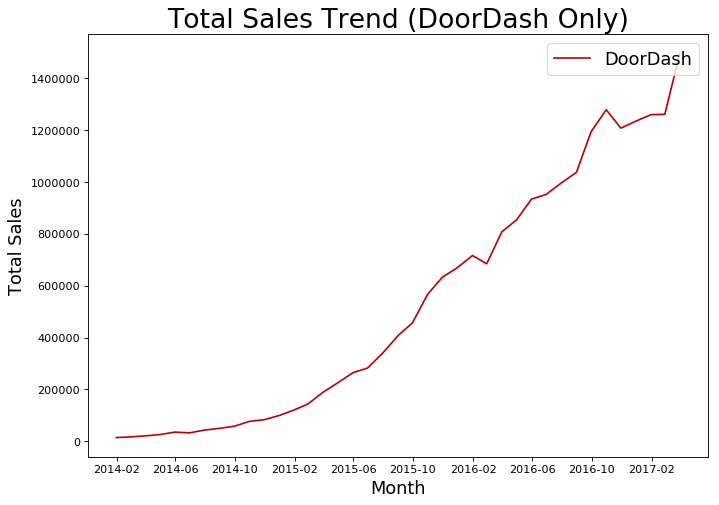

In [27]:
figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot_date(dd_month.date, dd_month.daily_total, label='DoorDash', ls='solid', marker='None', color = '#be0000')
plt.legend(loc='upper right', fontsize = 16);
plt.title('Total Sales Trend (DoorDash Only)', fontsize = 24);
plt.xlabel('Month', fontsize = 16);
plt.ylabel('Total Sales', fontsize = 16);

##### Trend of Number of Daily Transactions

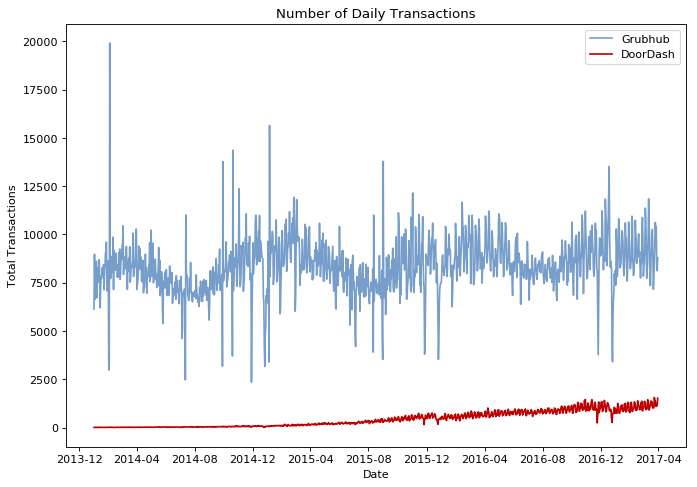

In [28]:
figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot_date(gh_date.date, gh_date.daily_transactions, label='Grubhub', ls='solid', marker='None', color = '#779ecb')
plt.plot_date(dd_date.date, dd_date.daily_transactions, label='DoorDash', ls='solid', marker='None', color = '#be0000')
plt.legend(loc='upper right');
plt.title('Number of Daily Transactions');
plt.xlabel('Date');
plt.ylabel('Total Transactions');

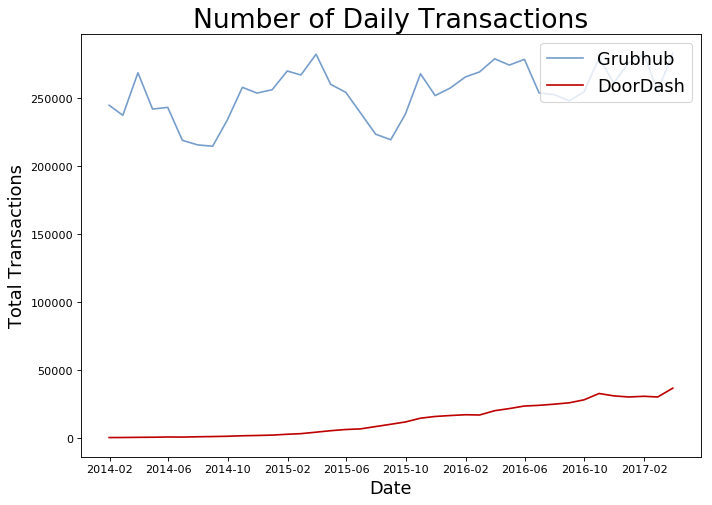

In [29]:
figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot_date(gh_month.date, gh_month.daily_transactions, label='Grubhub', ls='solid', marker='None', color = '#779ecb')
plt.plot_date(dd_month.date, dd_month.daily_transactions, label='DoorDash', ls='solid', marker='None', color = '#be0000')
plt.legend(loc='upper right', fontsize = 16);
plt.title('Number of Daily Transactions', fontsize = 24);
plt.xlabel('Date', fontsize = 16);
plt.ylabel('Total Transactions', fontsize = 16);

In [30]:
#gh peak
gh_y.max()
np.where(gh_y == gh_y.max())
#dd peak
dd_y.max()
np.where(dd_y == dd_y.max())

231.0

(array([16], dtype=int64),)

709.0

(array([0], dtype=int64),)

Identical to Total Sales Trend

#### Outliers

In [31]:
# Single Transaction
gh_dd[gh_dd.amount == max(gh_dd.amount)]

,company,date,member_id,amount
5114486,Grubhub,2015-07-21,3faa62d16468ec176ba520adc48e8dce,8073.1201


In [32]:
gh_dd[gh_dd.member_id == '3faa62d16468ec176ba520adc48e8dce']
gh_dd[gh_dd.member_id == '3faa62d16468ec176ba520adc48e8dce'].amount.sum()
gh_dd[gh_dd.member_id == '3faa62d16468ec176ba520adc48e8dce'].amount.mean()
gh_dd[gh_dd.member_id == '3faa62d16468ec176ba520adc48e8dce'].amount.count()
gh_dd[gh_dd.member_id == '3faa62d16468ec176ba520adc48e8dce'].amount.max()
gh_dd[gh_dd.member_id == '3faa62d16468ec176ba520adc48e8dce'].amount.min()

,company,date,member_id,amount
218791,DoorDash,2016-06-03,3faa62d16468ec176ba520adc48e8dce,146.5800
439968,DoorDash,2017-01-27,3faa62d16468ec176ba520adc48e8dce,840.9300
3041157,Grubhub,2014-11-18,3faa62d16468ec176ba520adc48e8dce,252.4500
4633684,Grubhub,2015-05-19,3faa62d16468ec176ba520adc48e8dce,2043.6000
4698859,Grubhub,2015-05-27,3faa62d16468ec176ba520adc48e8dce,4255.0498
4761067,Grubhub,2015-06-04,3faa62d16468ec176ba520adc48e8dce,81.2900
4805546,Grubhub,2015-06-09,3faa62d16468ec176ba520adc48e8dce,1962.4900
4890410,Grubhub,2015-06-20,3faa62d16468ec176ba520adc48e8dce,6944.5098
5065793,Grubhub,2015-07-14,3faa62d16468ec176ba520adc48e8dce,1647.5601
5114486,Grubhub,2015-07-21,3faa62d16468ec176ba520adc48e8dce,8073.1201


105008.7501

2187.68229375

48

8073.1201

26.09

In [33]:
gh_dd[(gh_dd.amount >= 1000) & (gh_dd.company == 'Grubhub')].member_id.nunique()
gh_dd[(gh_dd.amount >= 1000) & (gh_dd.company == 'DoorDash')].member_id.nunique()

19

3

In [34]:
#date spikes
gh_date.nlargest(5, columns=['daily_total'])

,date,daily_total,daily_transactions
33,2014-02-03,517603.2400,19901
369,2015-01-05,436325.0200,15638
1083,2016-12-19,420899.4400,13511
608,2015-09-01,390102.1101,13781
292,2014-10-20,384619.8600,14362


In [35]:
#date dips 2015, 2016
gh_date[(gh_date.date >= '2016-01-01') & (gh_date.date <= '2016-12-31')].nsmallest(2, columns=['daily_total'])
gh_date[(gh_date.date >= '2015-01-01') & (gh_date.date <= '2015-12-31')].nsmallest(5, columns=['daily_total'])

,date,daily_total,daily_transactions
1090,2016-12-26,112817.04,3411
1060,2016-11-26,116707.45,3770


,date,daily_total,daily_transactions
607,2015-08-31,98903.45,3528
587,2015-08-11,101529.71,3907
368,2015-01-04,104623.11,3392
695,2015-11-27,112596.03,3800
724,2015-12-26,113885.96,3530


#### Summary and Expectations

1)  Grubhub is the clear market leader. <br>
2)  DoorDash has been gaining marketshare over time.

### What is the market share between Grubhub and Doordash in the US?

###### Daily

In [36]:
gh_dd_date = gh_date.merge(dd_date, left_on = 'date', right_on = 'date')
gh_dd_date.columns = ['date', 'gh_daily_sales', 'gh_daily_transactions', 'dd_daily_sales', 'dd_daily_transactions']

In [37]:
gh_dd_date['gh_daily_sales_pct'] = (gh_dd_date['gh_daily_sales'] / (gh_dd_date['gh_daily_sales'] + gh_dd_date['dd_daily_sales']))
gh_dd_date['dd_daily_sales_pct'] = gh_dd_date['dd_daily_sales'] / (gh_dd_date['gh_daily_sales'] + gh_dd_date['dd_daily_sales'])
gh_dd_date['gh_daily_transactions_pct'] = gh_dd_date['gh_daily_transactions'] / (gh_dd_date['gh_daily_transactions'] + gh_dd_date['dd_daily_transactions'])
gh_dd_date['dd_daily_transactions_pct'] = gh_dd_date['dd_daily_transactions'] / (gh_dd_date['gh_daily_transactions'] + gh_dd_date['dd_daily_transactions'])

In [38]:
#Data Overview
gh_dd_date.gh_daily_sales_pct.max()
gh_dd_date.gh_daily_sales_pct.min()
gh_dd_date.dd_daily_sales_pct.max()
gh_dd_date.dd_daily_sales_pct.min()
gh_dd_date.gh_daily_transactions_pct.max()
gh_dd_date.gh_daily_transactions_pct.min()
gh_dd_date.dd_daily_transactions_pct.max()
gh_dd_date.dd_daily_transactions_pct.min()

0.9998560504644556

0.7256536061500655

0.2743463938499345

0.00014394953554434817

0.9998791978738826

0.7768390686173501

0.22316093138264992

0.00012080212611741966

##### Monthly

In [39]:
gh_dd_month = gh_month.merge(dd_month, left_on = 'date', right_on = 'date')
gh_dd_month.columns = ['date', 'gh_monthly_sales', 'gh_monthly_transactions', 'dd_monthly_sales', 'dd_monthly_transactions']

In [40]:
gh_dd_month['gh_monthly_sales_pct'] = (gh_dd_month['gh_monthly_sales'] / (gh_dd_month['gh_monthly_sales'] + gh_dd_month['dd_monthly_sales']))
gh_dd_month['dd_monthly_sales_pct'] = gh_dd_month['dd_monthly_sales'] / (gh_dd_month['gh_monthly_sales'] + gh_dd_month['dd_monthly_sales'])
gh_dd_month['gh_monthly_transactions_pct'] = gh_dd_month['gh_monthly_transactions'] / (gh_dd_month['gh_monthly_transactions'] + gh_dd_month['dd_monthly_transactions'])
gh_dd_month['dd_monthly_transactions_pct'] = gh_dd_month['dd_monthly_transactions'] / (gh_dd_month['gh_monthly_transactions'] + gh_dd_month['dd_monthly_transactions'])

In [41]:
gh_dd_month['gh_monthly_sales_pct'] = gh_dd_month['gh_monthly_sales_pct'] * 100
gh_dd_month['dd_monthly_sales_pct'] = gh_dd_month['dd_monthly_sales_pct']* 100
gh_dd_month['gh_monthly_transactions_pct'] = gh_dd_month['gh_monthly_transactions_pct'] * 100
gh_dd_month['dd_monthly_transactions_pct'] = gh_dd_month['dd_monthly_transactions_pct'] * 100

In [42]:
#Data Overview
gh_dd_month.gh_monthly_sales_pct.max()
gh_dd_month.gh_monthly_sales_pct.min()
gh_dd_month.dd_monthly_sales_pct.max()
gh_dd_month.dd_monthly_sales_pct.min()
gh_dd_month.gh_monthly_transactions_pct.max()
gh_dd_month.gh_monthly_transactions_pct.min()
gh_dd_month.dd_monthly_transactions_pct.max()
gh_dd_month.dd_monthly_transactions_pct.min()

99.77146880829832

85.26270699147264

14.737293008527372

0.22853119170167954

99.87105461816253

88.53649611064716

11.463503889352838

0.12894538183747167

#### Market Share by Sales

In [43]:
x = [dt.datetime.strptime(str(d)[:10],'%Y-%m-%d').date() for d in gh_dd_date.date]
y = [gh_dd_date.dd_daily_sales_pct, gh_dd_date.gh_daily_sales_pct]

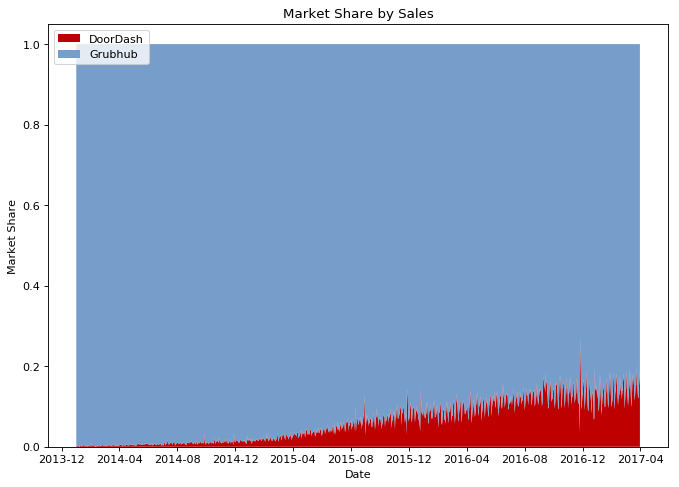

In [44]:
#daily
figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
plt.stackplot(x, y, labels=['DoorDash', 'Grubhub'], colors=['#be0000', '#779ecb']);
plt.legend(loc='upper left');
plt.title('Market Share by Sales');
plt.xlabel('Date');
plt.ylabel('Market Share');

In [45]:
x = [dt.datetime.strptime(str(d)[:7],'%Y-%m').date() for d in gh_dd_month.date]
y = [gh_dd_month.dd_monthly_sales_pct, gh_dd_month.gh_monthly_sales_pct]

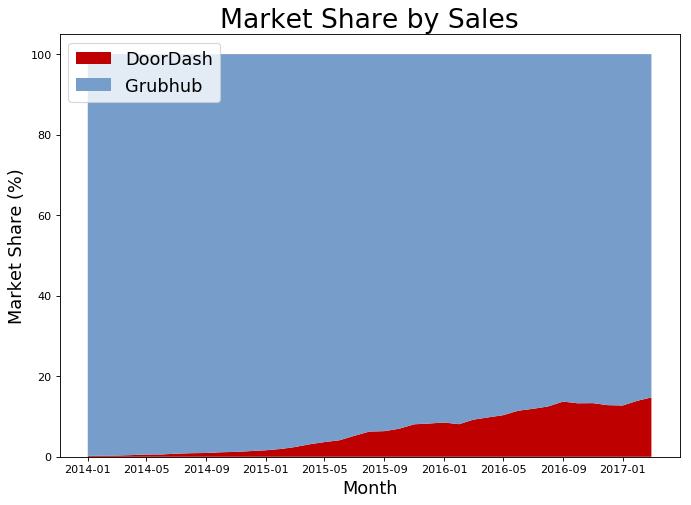

In [46]:
#monthly
figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
plt.stackplot(x, y, labels=['DoorDash', 'Grubhub'], colors=['#be0000', '#779ecb']);
plt.legend(loc='upper left', fontsize = 16);
plt.title('Market Share by Sales', fontsize = 24);
plt.xlabel('Month', fontsize = 16);
plt.ylabel('Market Share (%)', fontsize = 16);

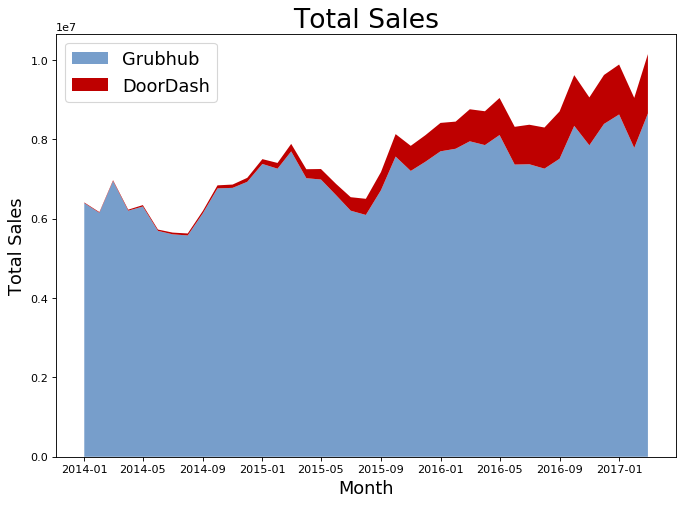

In [47]:
#Stacked total sales
x = [dt.datetime.strptime(str(d)[:7],'%Y-%m').date() for d in gh_dd_month.date]
y = [gh_dd_month.gh_monthly_sales, gh_dd_month.dd_monthly_sales]
figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
plt.stackplot(x, y, labels=['Grubhub', 'DoorDash'], colors=['#779ecb', '#be0000']);
plt.legend(loc='upper left', fontsize = 16);
plt.title('Total Sales', fontsize = 24);
plt.xlabel('Month', fontsize = 16);
plt.ylabel('Total Sales', fontsize = 16);

#### Market Share by Transactions

In [48]:
x = [dt.datetime.strptime(str(d)[:10],'%Y-%m-%d').date() for d in gh_dd_date.date]
y = [gh_dd_date.dd_daily_transactions_pct, gh_dd_date.gh_daily_transactions_pct]

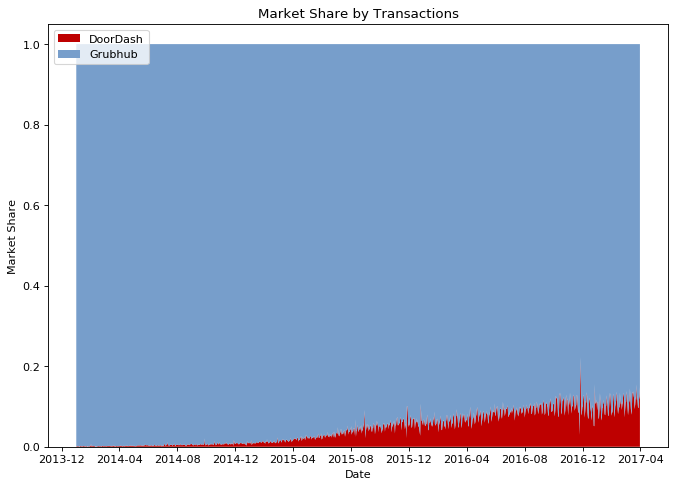

In [49]:
figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
plt.stackplot(x, y, labels=['DoorDash', 'Grubhub'], colors=['#be0000', '#779ecb']);
plt.legend(loc='upper left');
plt.title('Market Share by Transactions');
plt.xlabel('Date');
plt.ylabel('Market Share');

##### Unique Users

In [50]:
gh_unique_users = gh.groupby('date')['member_id'].nunique().reset_index()
gh_unique_users.columns = ['date', 'unique_users']
dd_unique_users = dd.groupby('date')['member_id'].nunique().reset_index()
dd_unique_users.columns = ['date', 'unique_users']

In [51]:
gh_dd_unique_users = gh_unique_users.merge(dd_unique_users, left_on = 'date', right_on = 'date')
gh_dd_unique_users.columns = ['date', 'gh_unique_users', 'dd_unique_users']

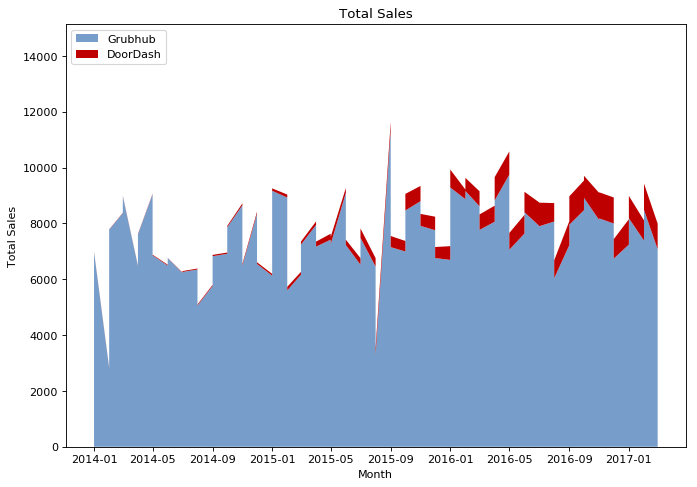

In [52]:
x = [dt.datetime.strptime(str(d)[:7],'%Y-%m').date() for d in gh_dd_unique_users.date]
y = [gh_dd_unique_users.gh_unique_users, gh_dd_unique_users.dd_unique_users]
figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
plt.stackplot(x, y, labels=['Grubhub', 'DoorDash'], colors=['#779ecb', '#be0000']);
plt.legend(loc='upper left');
plt.title('Total Sales');
plt.xlabel('Month');
plt.ylabel('Total Sales');

marketshare is too far in favor of Grubhub thus not a good indicator of relative growth

##### New User Analysis

In [53]:
gh_dd_new_user = gh_dd.groupby(['company', 'member_id'])['date'].min().reset_index()
gh_new_user = gh_dd_new_user[(gh_dd_new_user.company == 'Grubhub') & (gh_dd_new_user.date >= '2015-01-01')]
dd_new_user = gh_dd_new_user[(gh_dd_new_user.company == 'DoorDash') & (gh_dd_new_user.date >= '2015-01-01')]
gh_new_user = gh_new_user.set_index('date')
dd_new_user = dd_new_user.set_index('date')
gh_new_user_count = gh_new_user.groupby(pd.Grouper(freq='M'))['member_id'].count().reset_index()
dd_new_user_count = dd_new_user.groupby(pd.Grouper(freq='M'))['member_id'].count().reset_index()

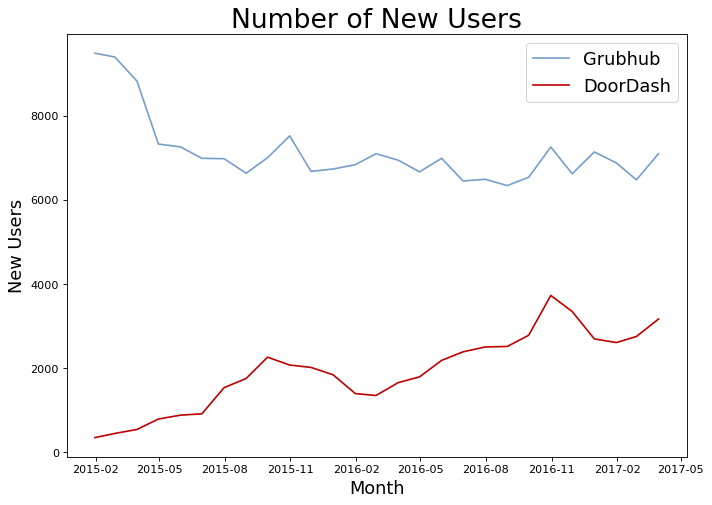

In [54]:
figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot_date(gh_new_user_count.date, gh_new_user_count.member_id, label='Grubhub', ls='solid', marker='None', color = '#779ecb')
plt.plot_date(dd_new_user_count.date, dd_new_user_count.member_id, label='DoorDash', ls='solid', marker='None', color = '#be0000')
plt.legend(loc='upper right', fontsize = 16);
plt.title('Number of New Users', fontsize = 24);
plt.xlabel('Month', fontsize = 16);
plt.ylabel('New Users', fontsize = 16);

#### Marketshare datapoints

1) Previous 7 days

In [55]:
gh_dd_date.date = pd.to_datetime(gh_dd_date.date)
gh_dd_week = gh_dd_date[gh_dd_date.date > (max(gh_dd_date.date) - dt.timedelta(days=7))]
gh_dd_week.dd_daily_sales.sum() / (gh_dd_week.dd_daily_sales.sum() + gh_dd_week.gh_daily_sales.sum())

0.15121076520426424

2) Previous 30 days

In [56]:
gh_dd_month = gh_dd_date[gh_dd_date.date > (max(gh_dd_date.date) - dt.timedelta(days=30))]
gh_dd_month.dd_daily_sales.sum() / (gh_dd_month.dd_daily_sales.sum() + gh_dd_month.gh_daily_sales.sum())

0.1473920638502603

3) Previous 90 Days

In [57]:
gh_dd_quarter = gh_dd_date[gh_dd_date.date > (max(gh_dd_date.date) - dt.timedelta(days=90))]
gh_dd_quarter.dd_daily_sales.sum() / (gh_dd_quarter.dd_daily_sales.sum() + gh_dd_quarter.gh_daily_sales.sum())

0.13805603680664008

4) Jan 2017

In [58]:
jan_2017 = gh_dd_date[(gh_dd_date.date >= '2017-01-01') & (gh_dd_date.date <= '2017-01-31')]
jan_2017.dd_daily_sales.sum() / (jan_2017.dd_daily_sales.sum() + jan_2017.gh_daily_sales.sum())

0.12734104310112038

5) Jan 2016

In [59]:
jan_2016 = gh_dd_date[(gh_dd_date.date >= '2016-01-01') & (gh_dd_date.date <= '2016-01-31')]
jan_2016.dd_daily_sales.sum() / (jan_2016.dd_daily_sales.sum() + jan_2016.gh_daily_sales.sum())

0.08510395709833914

6) Jan 2015

In [60]:
jan_2015 = gh_dd_date[(gh_dd_date.date >= '2015-01-01') & (gh_dd_date.date <= '2015-01-31')]
jan_2015.dd_daily_sales.sum() / (jan_2015.dd_daily_sales.sum() + jan_2015.gh_daily_sales.sum())

0.016196394772904615

7) Mar 2017

In [61]:
mar_2017 = gh_dd_date[(gh_dd_date.date >= '2017-03-01') & (gh_dd_date.date <= '2017-03-31')]
mar_2017.dd_daily_sales.sum() / (mar_2017.dd_daily_sales.sum() + mar_2017.gh_daily_sales.sum())

0.14737293008527372

### For Members predominantly using DoorDash in January 2015, are they still predominantly using DoorDash or has their behavior changed?

1)  Define 'now' as last 90 days <br>
2)  Predominantly is greater than 60% of use

In [62]:
now = 90
dominate = 0.6

In [63]:
#Get user list in January 2015
customer_01_2015 = gh_dd[(gh_dd.date >= '2015-01-01') & (gh_dd.date <= '2015-01-31')]

In [64]:
sort_customer_01_2015 = customer_01_2015.groupby(['member_id', 'company']).size().reset_index()

In [65]:
#Determine use ratio for users
door_customer_01_2015 = sort_customer_01_2015[sort_customer_01_2015.company == 'DoorDash'].drop(['company'], axis=1)
gh_customer_01_2015 = sort_customer_01_2015[sort_customer_01_2015.company == 'Grubhub'].drop(['company'], axis=1)
dd_customer_01_2015 = door_customer_01_2015.merge(gh_customer_01_2015, left_on = 'member_id', right_on = 'member_id', how = 'left')
dd_customer_01_2015.fillna(0, inplace=True)
dd_customer_01_2015.columns = ['member_id', 'dd_transactions', 'gh_transactions']

In [66]:
#Keep only primarily DoorDash Users
dd_customer_01_2015['dd_pct'] = dd_customer_01_2015['dd_transactions'] / (dd_customer_01_2015['dd_transactions'] + dd_customer_01_2015['gh_transactions'])
dd_customer_01_2015 = dd_customer_01_2015[dd_customer_01_2015.dd_pct >= dominate]

In [67]:
#Obtain User list to find current users
customer_list = dd_customer_01_2015['member_id'].tolist()

In [68]:
#Find users in last 90 days
current_transactions = gh_dd[gh_dd.date >= (max(gh_dd.date) - timedelta(days=now))]
current_transactions = current_transactions[current_transactions.member_id.isin(customer_list) ]

In [69]:
current_transactions.member_id.nunique()
len(customer_list)

454

956

In [70]:
#Calculate usage of current users
sort_current_transactions = current_transactions.groupby(['member_id', 'company']).size().reset_index()
dd_current = sort_current_transactions[sort_current_transactions.company == 'DoorDash'].drop(['company'], axis=1)
gh_current = sort_current_transactions[sort_current_transactions.company == 'Grubhub'].drop(['company'], axis=1)
current_customer = dd_current.merge(gh_current, left_on = 'member_id', right_on = 'member_id', how = 'outer')
current_customer.fillna(0, inplace=True)
current_customer.columns = ['member_id', 'dd_transactions', 'gh_transactions']

In [71]:
current_customer['dd_pct'] = current_customer['dd_transactions'] / (current_customer['dd_transactions'] + current_customer['gh_transactions'])

Use Sankey Diagram for user journey

In [72]:
#Build table for plotly input
dd_current = pd.DataFrame()
dd_current['member_id'] = dd_customer_01_2015['member_id']
dd_current['source'] = 0
dd_current['target'] = 4
dd_current = dd_current.merge(current_customer, left_on = 'member_id', right_on = 'member_id', how = 'left')

In [73]:
# 1 = DoorDash
# 2 = Both
# 3 = Grubhub
# 4 = Neither
dd_current.loc[dd_current.dd_pct >= 0.6, 'target'] = 1
dd_current.loc[(dd_current.dd_pct < 0.6) & (dd_current.dd_pct > 0.4), 'target'] = 2
dd_current.loc[dd_current.dd_pct <= 0.4, 'target'] = 3

In [74]:
journey_table = dd_current.groupby(['source', 'target']).size().reset_index()
journey_table.columns = ['source', 'target', 'value']

In [75]:
journey_table = journey_table.append(pd.Series([0, 0, 0], index=['source', 'target', 'value'], name='4'))
journey_table['Node, Label'] = ['DoorDash Origin', 'Primarily DoorDash', 'Mixed', 'Primarily Gruhub', 'Non-Returning']
journey_table['Color'] = ['#be0000', '#be0000', '8b008b', '#779ecb', 'grey']

In [76]:
#Completed Table
journey_table.head()

,source,target,value,"Node, Label",Color
0,0,1,397,DoorDash Origin,#be0000
1,0,2,9,Primarily DoorDash,#be0000
2,0,3,48,Mixed,8b008b
3,0,4,502,Primarily Gruhub,#779ecb
4,0,0,0,Non-Returning,grey


In [77]:
data_trace = dict(
    type='sankey',
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    node = dict(
      pad = 10,
      thickness = 30,
      line = dict(
        color = "black",
        width = 0
      ),
      label = journey_table['Node, Label'].dropna(axis=0, how='any'),
      color = journey_table['Color'].dropna(axis=0, how='any')
    ),
    link = dict(
      source = journey_table['source'].dropna(axis=0, how='any'),
      target = journey_table['target'].dropna(axis=0, how='any'),
      value = journey_table['value'].dropna(axis=0, how='any'),
  )
)

layout =  dict(
    title = "DoorDash Customer Journey",
    height = 772,
    font = dict(
      size = 24
    ),    
)

fig = dict(data=[data_trace], layout=layout)
py.iplot(fig, validate=False)

In [78]:
journey_table_2 = journey_table
journey_table_2.iloc[3,1] = 0
journey_table_2.iloc[3,2] = 0

In [79]:
data_trace = dict(
    type='sankey',
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    node = dict(
      pad = 10,
      thickness = 30,
      line = dict(
        color = "black",
        width = 0
      ),
      label =  journey_table_2['Node, Label'].dropna(axis=0, how='any'),
      color = journey_table['Color'].dropna(axis=0, how='any')
    ),
    link = dict(
      source = journey_table_2['source'].dropna(axis=0, how='any'),
      target = journey_table_2['target'].dropna(axis=0, how='any'),
      value = journey_table_2['value'].dropna(axis=0, how='any'),
  )
)

layout =  dict(
    title = "DoorDash Customer Journey",
    height = 772,
    font = dict(
      size = 24
    ),    
)

fig = dict(data=[data_trace], layout=layout)
py.iplot(fig, validate=False)